Sentiment Analysis means to identify the view or emotion behind a situation. It basically means to analyze and find the emotion or intent behind a piece of text or speech or any mode of communication. 

Sentiment Analysis Model takes in a huge corpus of data having user reviews and finds a pattern and comes up with a conclusion based on real evidence rather than assumptions made on a small sample of data.

# Problem Statement

Sentiment analysis on text data using NLP and to build a predective system to classifiy whether the given input sentiment is positive or negative.

# Work Flow

1. Data Collection -> involves 2 text datasets of training data and text data
2. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
3. Data Pre-processing -> converting it into vectors before passing it to the machine learning model
4. Model Builing -> train an ML model for Sentiment Classification as positive or negative
5. Model Evaluation -> evaluating on test data using various evaluation metrics
6. Predicting for Custom Input -> build a predective system to classifiy whether the given input sentiment is positive or negative

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from wordcloud import WordCloud                # library to visualize text data
import re                                      # to pre-process the strings as per the given regular expression

import nltk                                    # Natural Language Toolkit 
from nltk.corpus import stopwords              # collection of words that don’t provide any meaning to a sentence
from nltk.stem import WordNetLemmatizer        # to convert different forms of words into a single item 

from sklearn.feature_extraction.text import CountVectorizer     # transforms text to vectors
from sklearn.model_selection import GridSearchCV                # hyperparameter tuning

# Data Collection

As the data is in text format, separated by semicolons and without column names, we will create the data frame with read_csv() and parameters as “delimiter” and “names”.

In [2]:
# loading the training data 

train_data = pd.read_csv('train.txt', delimiter=';', names=['text', 'label'])
train_data.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
train_data.shape

(16000, 2)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [5]:
# loading the validation data

val_data = pd.read_csv('test.txt', delimiter=';', names=['text', 'label'])
val_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
val_data.shape

(2000, 2)

In [7]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


# Data Analysis

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

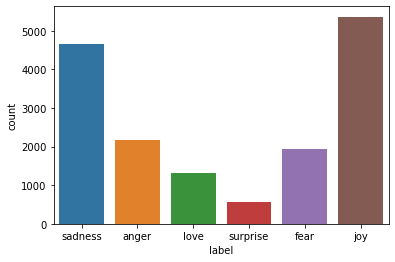

In [8]:
# visualization of different labels present in the data

sb.countplot(train_data.label)

As we can see that, we have 6 labels or targets in the dataset. We can make a Binary classifier for Sentiment Analysis. we will merge these labels into two classes, i.e. Positive and Negative sentiment.

- Positive Sentiment - "joy","love","surprise"
- Negative Sentiment - "anger","sadness","fear"

In [9]:
# create a custom encoder to convert categorical target labels to numerical form, i.e. (0 and 1)

def custom_encoder(data):
    data.replace(to_replace ="surprise", value =1, inplace=True)
    data.replace(to_replace ="love", value =1, inplace=True)
    data.replace(to_replace ="joy", value =1, inplace=True)
    data.replace(to_replace ="fear", value =0, inplace=True)
    data.replace(to_replace ="anger", value =0, inplace=True)
    data.replace(to_replace ="sadness", value =0, inplace=True)

In [10]:
custom_encoder(train_data['label'])

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

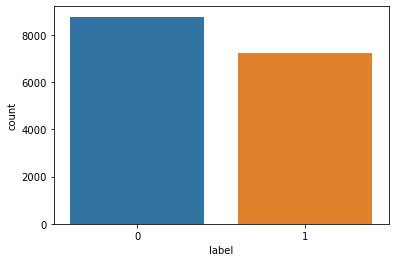

In [11]:
sb.countplot(train_data.label)

Now, we can see that our target has changed to 0 and 1,i.e. 0 for Negative and 1 for Positive, and the data is more or less in a balanced state.

In [12]:
train_data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


# Data Pre-processing

Pre-processing on the data before converting it into vectors and passing it to the machine learning model.

In [13]:
# object of WordNetLemmatizer

lm = WordNetLemmatizer()

- iterating through each record and using regualr expression, we will get rid of any characters apart from alphabets
- convert the string to lowercase
- check for stopwords in the data and get rid of them
- perform lemmatization on each word,i.e. change the different forms of word into a single item called as lemma

In [14]:
# create a function for pre-processing of data

def text_transformation(data_col):
    
    corpus = []
    
    for item in data_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [15]:
corpus = text_transformation(train_data['text'])

Now, we will create a **Word Cloud**. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed.

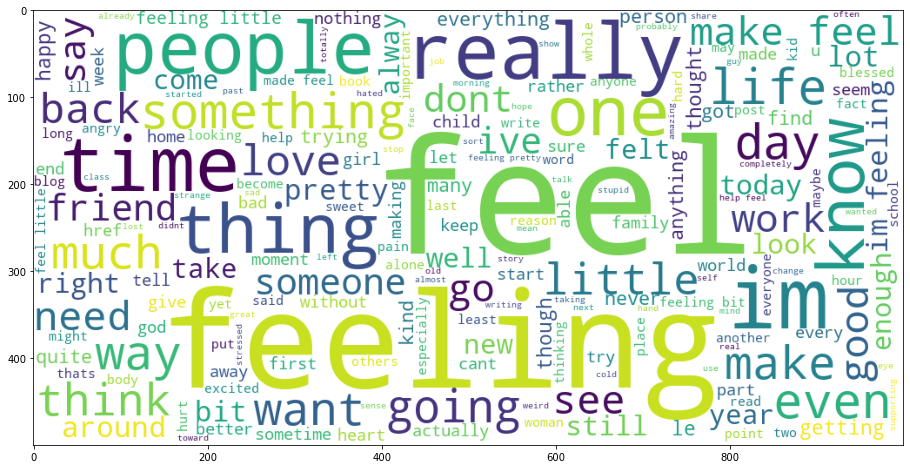

In [16]:
from matplotlib import style,rcParams

rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

**Bag of Words**

It describes the total occurrence of words within a document.

Bag of Words Model(BOW) is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

In [17]:
# converting the text data into vectors, by fitting and transforming the corpus that we have created.

cv = CountVectorizer(ngram_range=(1,2))     # ngram_range as (1,2) signifies a bigram
# Ngram is a sequence of ‘n’ of words in a row or sentence.
 
x_train = cv.fit_transform(corpus)
y_train = train_data.label

# Model Building

We will be using **Logistic Regression**, and we will tune the hyperparameters using GridSearchCV.

In [18]:
# loading the logistic regression model
from sklearn.linear_model import LogisticRegression

model_logistic_reg  = LogisticRegression().fit(x_train, y_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# accuracy of training data
from sklearn.metrics import accuracy_score

x_train_log = model_logistic_reg.predict(x_train)
training_accuracy_log = accuracy_score(x_train_log, y_train)
training_accuracy_log

0.998875

# Model Evaluation

In [20]:
x_test, y_test = val_data.text, val_data.label

# encode the labels into two classes , 0 and 1
custom_encoder(y_test)

# pre-processing of text
test_corpus = text_transformation(x_test)

# convert text data into vectors
test_data = cv.transform(test_corpus)

# predict the target
predictions = model_logistic_reg.predict(test_data)

Evaluation Metrics

- Accuracy Score – no. of correctly classified instances/total no. of instances
- Precision Score – the ratio of correctly predicted instances over total positive instances
- Recall Score – the ratio of correctly predicted instances over total instances in that class
- Roc Curve – a plot of true positive rate against false positive rate
- Confusion Matrix – a table used to describe the classification models

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[1056,   24],
       [  35,  885]], dtype=int64)

In [22]:
# import precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9705
Precision score:  0.9735973597359736
Recall score:  0.9619565217391305
F1 score:  0.967741935483871


**ROC curve**

We will find the probability of the class using the predict_proba() and then we will plot the roc curve.

In [23]:
predictions_probability = model_logistic_reg.predict_proba(test_data)

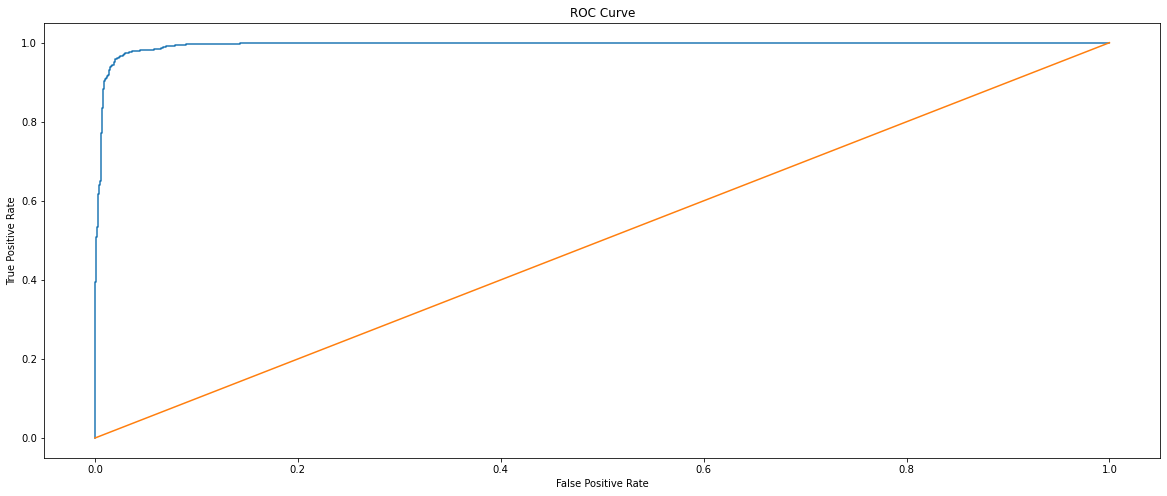

In [24]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our model performed very well in classifying the sentiments, with an Accuracy score, Precision and  Recall of approx **97%**. And the roc curve and confusion matrix are great as well which means that our model is able to classify the labels accurately, with fewer chances of error.

# Predicting for Custom Input:

In [25]:
def expression_check(prediction_input):
    
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [26]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_logistic_reg.predict(transformed_input)
    expression_check(prediction)

In [27]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]

sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


**We can see that our model accurately classified the sentiments behind the two sentences.**

# Naive Bayes Classifier

**Model Building**

In [29]:
# Loading Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB().fit(x_train,y_train)

In [30]:
# accuracy of training data

x_train_nb = model_naive.predict(x_train)
training_accuracy_nb = accuracy_score(x_train_nb, y_train)
training_accuracy_nb

0.996625

**Model Evaluation**

In [31]:
# predict the target
predictions = model_naive.predict(test_data)

In [32]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[1050,   30],
       [  70,  850]], dtype=int64)

In [33]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.95
Precision score:  0.9659090909090909
Recall score:  0.9239130434782609
F1 score:  0.9444444444444444


**ROC Curve**

In [34]:
# probability of the class using the predict_proba()
predictions_probability = model_naive.predict_proba(test_data)

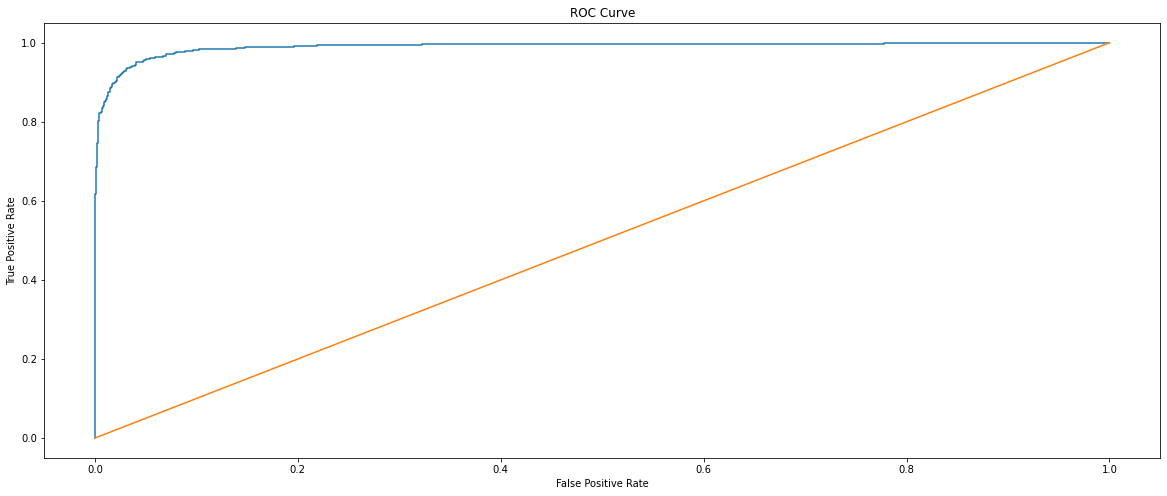

In [35]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Naive Bayes model performed very well in classifying the sentiments, with an Accuracy score, Precision and Recall of approx **95**%. And the roc curve and confusion matrix are great as well which means that Naive Bayes model is able to classify the labels accurately, with fewer chances of error.

# SVM Classifier

**Model Building**

In [36]:
# Loading Support Vector Machine Model
from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(x_train,y_train)

In [37]:
# accuracy of training data

x_train_svm = model_svm.predict(x_train)
training_accuracy_svm = accuracy_score(x_train_svm, y_train)
training_accuracy_svm

0.999375

**Model Evaluation**

In [38]:
# predict the target
predictions = model_svm.predict(test_data)

In [39]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[1049,   31],
       [  31,  889]], dtype=int64)

In [40]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.969
Precision score:  0.966304347826087
Recall score:  0.966304347826087
F1 score:  0.966304347826087


As we can see that our SVM Classifier model performed very well in classifying the sentiments, with an Accuracy score, Precision and Recall of approx 96%. 

# Comparison

Decreasing order of accuracy is depicted as:
- Logistic Regression - 0.9705
- SVM Classifier - 0.969
- Naive Bayes - 0.95

The results are highly clear that all the models are good in classifying the seniments as positive or negative. Logistic regression is the most accurate model because its ability to handle binary classification. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.